   ## Predictions: Regression for Car Mileage


<img src="car_mileage.png" width="60%">


## Project Objectives

1. **Data Loading:**
   - Load datasets using Pandas.

2. **Target and Features Identification:**
   - Identify the target variable (car mileage) and relevant features.

3. **Model Building:**
   - Utilize Linear Regression to create a predictive model.

4. **Model Evaluation:**
   - Assess the model's performance using appropriate metrics.

5. **Prediction:**
   - Apply the trained model to make predictions on new data.



# Exploratory Data Analysis

In [31]:
#importing neccessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import math
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
#reading pandas data frame
df = pd.read_csv("auto-mpg.csv")

In [3]:
df.head() 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [5]:
# Check for the presence of %, #, *, or ? in each column
special_chars_columns = df.apply(lambda col: col.astype(str).str.contains(r'[%#*?]').any())

# Display columns with special characters
print("Columns with special characters:")
print(special_chars_columns[special_chars_columns].index.tolist())


Columns with special characters:
['horsepower']


In [6]:
# Function to find and display the exact special characters in a column
def find_special_characters(column):
    special_chars = set()
    for value in column.astype(str):
        special_chars.update(char for char in value if char in '%#*?')
    return special_chars

# Choose the column you want to check
column_name = 'horsepower'

# Check for special characters in the specified column
special_chars_set = find_special_characters(df[column_name])

# Display the exact special characters
print(f"Special characters in {column_name}: {special_chars_set}")


Special characters in horsepower: {'?'}


In [7]:
(df == "?").sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [8]:
df.drop(df[df["horsepower"] == '?'].index, inplace = True)

In [9]:
(df == "?").sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [10]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [11]:
df["horsepower"] = df["horsepower"].astype("float")
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [12]:

print(f"The shape of the data frame is {df.shape}")
print(f"The data frame has {len(df)} data points \n")

The shape of the data frame is (392, 9)
The data frame has 392 data points 



In [13]:
def plot_heatmap(dataframe, title="Correlation Heatmap", figsize=(10, 8)):
    """
    Plot a heatmap of the correlation matrix for a given DataFrame.

    Parameters:
    - dataframe: pd.DataFrame, input data
    - title: str, title for the plot (default: "Correlation Heatmap")
    - figsize: tuple, figure size (default: (10, 8))
    """
    # Calculate the correlation matrix
    corr_matrix = dataframe.corr()

    # Create a mask to display only the lower triangle of the heatmap
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Set up the matplotlib figure
    plt.figure(figsize=figsize)

    # Create a custom color palette
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": 0.7})

    # Set plot title
    plt.title(title)

    # Display the plot
    plt.show()


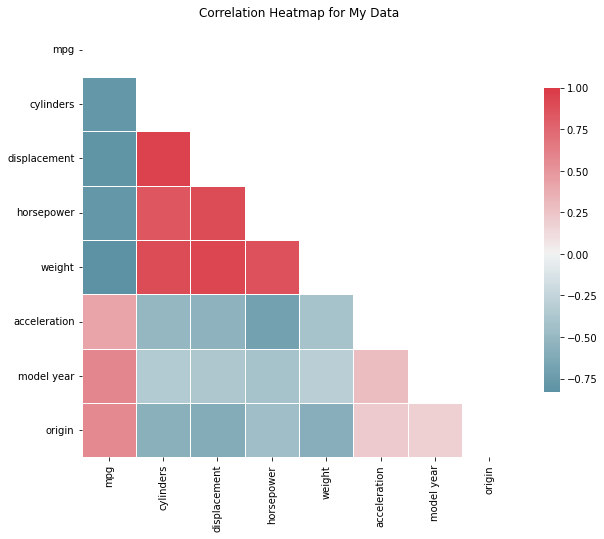

In [14]:

plot_heatmap(df, title="Correlation Heatmap for My Data")


In [15]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

# Model Building

In [35]:
# Selecting features for training data
x_train = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']]

In [34]:
# Selecting the target variable for training data
y_train = df[['mpg']]

In [33]:
# Print the shape of the training features (x_train) and target variable (y_train)
print(f'The shape of x_train is {x_train.shape}')
print(f'The shape of y_train is {y_train.shape}')

The shape of x_train is (392, 6)
The shape of y_train is (392, 1)


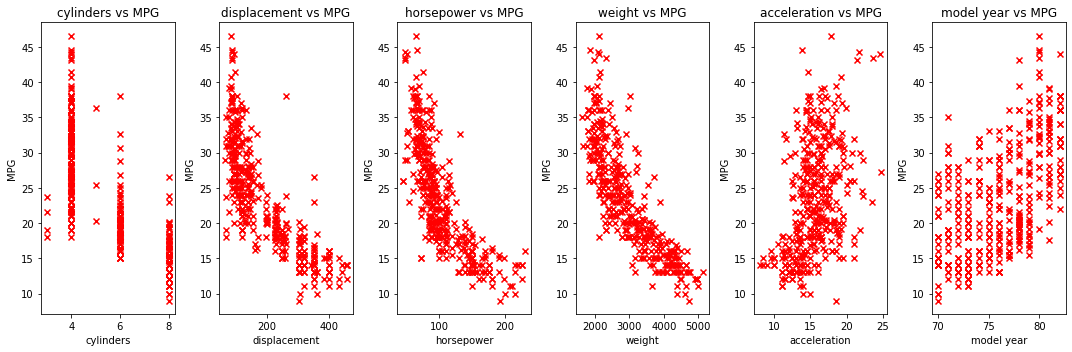

In [32]:
# Visualizing the relationship between each feature and the target variable (MPG)
num_features = x_train.shape[1]
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(15, 5))

# Iterate over each feature column for plotting
for i, column_name in enumerate(x_train.columns):
    # Scatter plot of the feature against the target variable (MPG)
    axes[i].scatter(x_train[column_name], y_train, marker="x", color="red")
    
    # Set plot title, x-axis label, and y-axis label
    axes[i].set_title(f"{column_name} vs MPG")
    axes[i].set_xlabel(column_name)
    axes[i].set_ylabel("MPG")

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


In [30]:
# Creating and fitting a Linear Regression model
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [28]:
lr.score(x_train, y_train)

0.8092552890383932

In [23]:
# Get input from the user for each feature
cylinders = int(input("Enter the number of cylinders: "))
engine_disp = float(input("Enter the engine displacement: "))
horsepower = float(input("Enter the horsepower: "))
weight = float(input("Enter the weight: "))
accelerate = float(input("Enter the acceleration: "))
year = int(input("Enter the year: "))

# Create a dictionary with the user inputs
user_input = {
    'Cylinders': cylinders,
    'Engine Disp': engine_disp,
    'Horsepower': horsepower,
    'Weight': weight,
    'Accelerate': accelerate,
    'Year': year
}

# Convert the dictionary to a DataFrame
user_df = pd.DataFrame([user_input])

# Now you can use this user_df as input to your trained model for prediction
predicted_value = lr.predict(user_df)




Enter the number of cylinders: 8
Enter the engine displacement: 390
Enter the horsepower: 190
Enter the weight: 3800
Enter the acceleration: 8.5
Enter the year: 70


In [26]:
# Print the predicted value
print("Predicted MPG:", predicted_value[0][0])

Predicted MPG: 13.38708415374957


In [27]:
print("{} miles per gallon is the mileage of a car with cylinders = {}, engine displacement = {}, horsepower = {}, weight = {}, acceleration = {} and year = {} "\
     .format(predicted_value[0][0], cylinders,engine_disp, horsepower, weight, accelerate, year))

13.38708415374957 miles per gallon is the mileage of a car with cylinders = 8, engine displacement = 390.0, horsepower = 190.0, weight = 3800.0, acceleration = 8.5 and year = 70 
